In [2]:
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import tracemalloc
import math
import numpy as np

In [3]:
def chroma_key(img_input, img_chromakey, color2change, treshold):
  """
  color2change: BGR!!!
  """
  if img_input.shape != img_chromakey.shape:
    raise TypeError(f"incorrect size: {img_input.shape} != {img_chromakey.shape}")
  rows_len = img_input.shape[0]
  columns_len = img_input.shape[1]
  for row in range(rows_len):
    for column in range(columns_len):
      pixel = img_input[row][column]
      pixel2 = img_chromakey[row][column]

      if math.dist(pixel, color2change) < treshold:
        img_input[row][column] = img_chromakey[row][column]
  return img_input


In [4]:
path_input = r"/content/drive/MyDrive/CV/шалунишки.jpg"
path_output = r"/content/drive/MyDrive/CV/типо_на_конференции.jpg"

### пример использования

In [5]:
custom_change_color = (204, 222, 233) #BGR

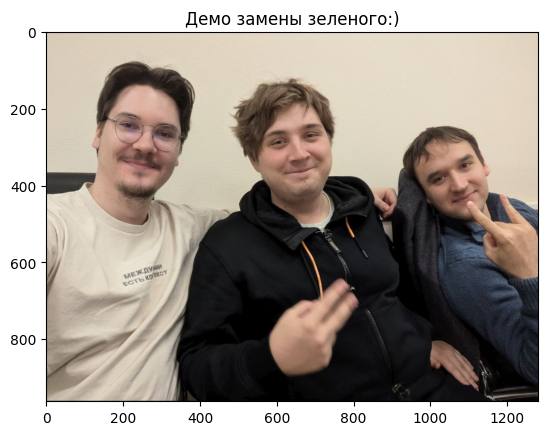

In [6]:
img_inp = cv2.imread(path_input)
img_back = cv2.imread(path_output)
img_back = cv2.resize(img_back, (img_inp.shape[1], img_inp.shape[0]))

imgfinal = chroma_key(img_inp, img_back, (0, 255, 0), 40)
plt.imshow(imgfinal[:,:,::-1])
plt.title("Демо замены зеленого:)")
plt.show()

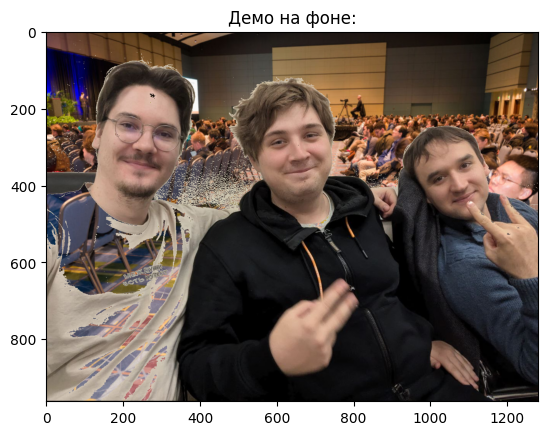

In [7]:
img_inp = cv2.imread(path_input)
img_back = cv2.imread(path_output)
img_back = cv2.resize(img_back, (img_inp.shape[1], img_inp.shape[0]))
imgfinal = chroma_key(img_inp, img_back, custom_change_color, 40)
plt.imshow(imgfinal[:,:,::-1])
plt.title("Демо на фоне:")
plt.show()

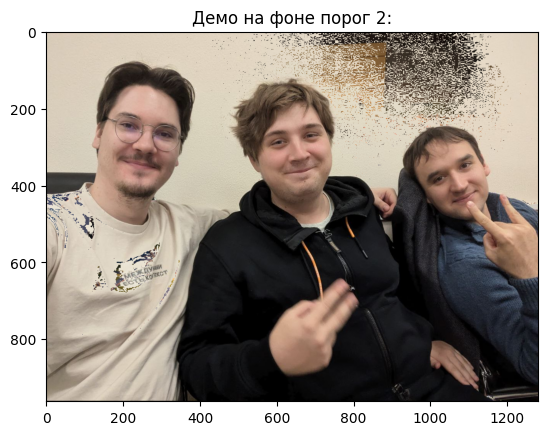

In [8]:
img_inp = cv2.imread(path_input)
img_back = cv2.imread(path_output)
img_back = cv2.resize(img_back, (img_inp.shape[1], img_inp.shape[0]))
imgfinal = chroma_key(img_inp, img_back, custom_change_color, 5)
plt.imshow(imgfinal[:,:,::-1])
plt.title("Демо на фоне порог 2:")
plt.show()

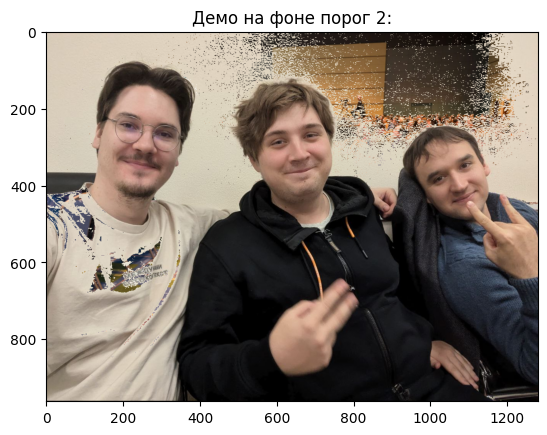

In [ ]:
img_inp = cv2.imread(path_input)
img_back = cv2.imread(path_output)
img_back = cv2.resize(img_back, (img_inp.shape[1], img_inp.shape[0]))
imgfinal = chroma_key(img_inp, img_back, custom_change_color, 10)
plt.imshow(imgfinal[:,:,::-1])
plt.title("Демо на фоне порог 10:")
plt.show()

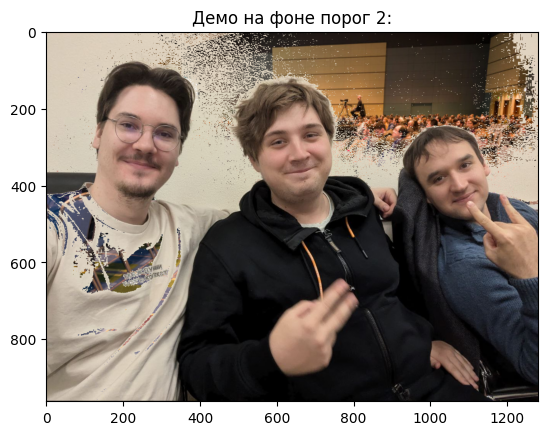

In [ ]:
img_inp = cv2.imread(path_input)
img_back = cv2.imread(path_output)
img_back = cv2.resize(img_back, (img_inp.shape[1], img_inp.shape[0]))
imgfinal = chroma_key(img_inp, img_back, custom_change_color, 15)
plt.imshow(imgfinal[:,:,::-1])
plt.title("Демо на фоне порог 15:")
plt.show()

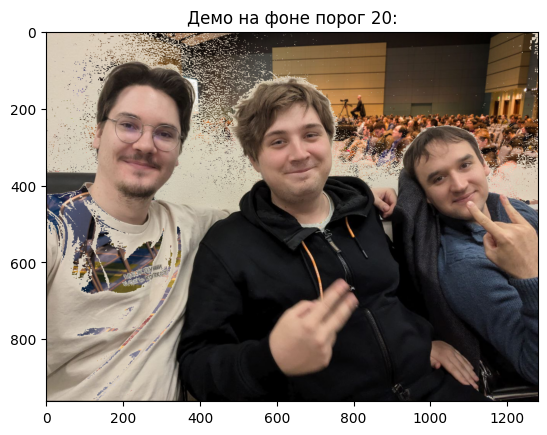

In [ ]:
img_inp = cv2.imread(path_input)
img_back = cv2.imread(path_output)
img_back = cv2.resize(img_back, (img_inp.shape[1], img_inp.shape[0]))
imgfinal = chroma_key(img_inp, img_back, custom_change_color, 20)
plt.imshow(imgfinal[:,:,::-1])
plt.title("Демо на фоне порог 20:")
plt.show()

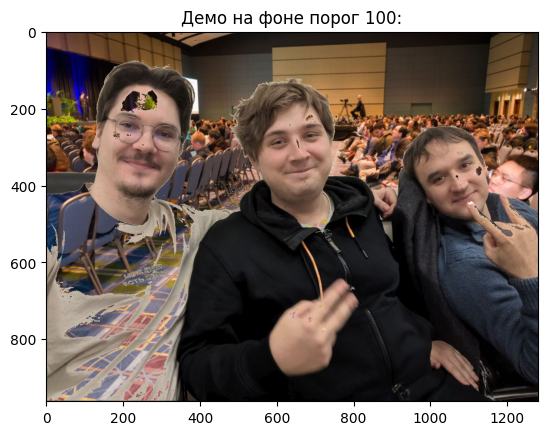

In [ ]:
img_inp = cv2.imread(path_input)
img_back = cv2.imread(path_output)
img_back = cv2.resize(img_back, (img_inp.shape[1], img_inp.shape[0]))
imgfinal = chroma_key(img_inp, img_back, custom_change_color, 60)
plt.imshow(imgfinal[:,:,::-1])
plt.title("Демо на фоне порог 100:")
plt.show()

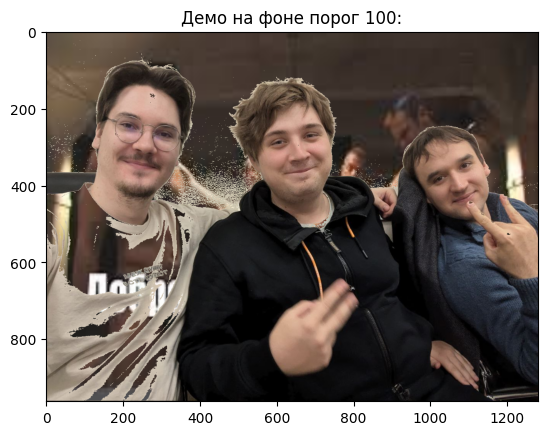

In [ ]:
img_inp = cv2.imread(path_input)
img_back = cv2.imread(r"/content/drive/MyDrive/CV/типо_в_экане.jpg")
img_back = cv2.resize(img_back, (img_inp.shape[1], img_inp.shape[0]))
imgfinal = chroma_key(img_inp, img_back, custom_change_color, 40)
plt.imshow(imgfinal[:,:,::-1])
plt.title("В ЭКАНЕ?!:")
plt.show()

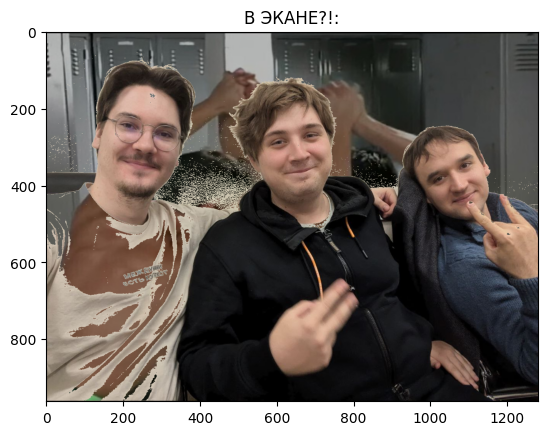

In [ ]:
img_inp = cv2.imread(path_input)
img_back = cv2.imread(r"/content/drive/MyDrive/CV/типо_в_экане_2.jpg")
img_back = cv2.resize(img_back, (img_inp.shape[1], img_inp.shape[0]))
imgfinal = chroma_key(img_inp, img_back, custom_change_color, 40)
plt.imshow(imgfinal[:,:,::-1])
plt.title("В ЭКАНЕ?!:")
plt.show()

### Пример замера времени

In [9]:
tracemalloc.start()
chroma_key(img_inp, img_back, custom_change_color, 40)
current, peak = tracemalloc.get_traced_memory()
print(f"Current: {current / 1024 / 1024:.2f} MB, Peak: {peak / 1024 / 1024:.2f} MB")
tracemalloc.stop()

Current: 0.00 MB, Peak: 0.02 MB


### Запуск на 100 фотках

In [10]:
path_input = r"/content/drive/MyDrive/CV/шалунишки.jpg"
path_output = r"/content/drive/MyDrive/CV/типо_на_конференции.jpg"

In [11]:
result_df = {}

In [15]:
import timeit
from copy import deepcopy
from tqdm import tqdm
import pandas as pd

In [20]:
img_interest_size = range(10, 1000, 10)
img_inp_o = cv2.imread(path_input)
img_back_o = cv2.imread(path_output)

for interest_configuration in tqdm(img_interest_size, desc="Benchmarking chroma key"):
  img_inp = cv2.resize(deepcopy(img_inp_o), (interest_configuration, interest_configuration))
  img_back = cv2.resize(deepcopy(img_back_o), (interest_configuration, interest_configuration))

  tracemalloc.start()
  chroma_key(img_inp, img_back, custom_change_color, 40)
  current, peak = tracemalloc.get_traced_memory()
  tracemalloc.stop()
  peak = peak / 1024 / 1024


  t = timeit.timeit(
      lambda: chroma_key(img_inp, img_back, custom_change_color, 40),
      number=10
  )
  t /= 10

  result_df[f"interest_configuration_{interest_configuration}"] = {
      "time": t,
      "memory_peak": peak,
      "memory_current": current / 1024 / 1024
  }

Benchmarking chroma key: 100%|██████████| 99/99 [25:21<00:00, 15.37s/it]


In [21]:
pd.DataFrame(result_df)

,interest_configuration,interest_configuration_10,interest_configuration_20,interest_configuration_30,interest_configuration_40,interest_configuration_50,interest_configuration_60,interest_configuration_70,interest_configuration_80,interest_configuration_90,...,interest_configuration_900,interest_configuration_910,interest_configuration_920,interest_configuration_930,interest_configuration_940,interest_configuration_950,interest_configuration_960,interest_configuration_970,interest_configuration_980,interest_configuration_990
time,2.415226,0.000366,0.001700,0.003228,0.006090,0.009511,0.013428,0.019454,0.023634,0.030150,...,1.978170,1.890731,1.919040,2.014976,2.169844,2.214614,2.240173,2.196868,2.145264,2.352884
memory_peak,0.002403,9.186657,0.000558,0.000558,0.000558,0.000775,0.000558,0.000558,0.000558,0.000775,...,0.002403,0.002403,0.002403,0.002403,0.002403,0.002403,0.002373,0.002403,0.002403,0.002373
memory_current,0.000362,5.663769,0.000000,0.000000,0.000000,0.000217,0.000000,0.000000,0.000000,0.000217,...,0.000362,0.000362,0.000362,0.000362,0.000362,0.000362,0.000362,0.000362,0.000362,0.000362
